# Import Necessary Libraries

In [695]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize Dataset

In [696]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Check Dataset

In [697]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Check for null values

In [698]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


Supplement the null values with string value "None"

In [699]:
df.fillna("None", inplace=True)

df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


# Manipulating the Dataset

 Feature Engineering: Splitting Blood Pressure to Systolic and Diastolic BP, Categorizing Blood Pressure Levels, and getting the Pulse Pressure

In [700]:
def extract_systolic_diastolic(bp_str):
  try:
    systolic, diastolic = map(int, bp_str.split('/'))
    return systolic, diastolic
  except:
    return None, None

df['SystolicBP'], df['DiastolicBP'] = zip(*df['Blood Pressure'].map(extract_systolic_diastolic))
df['Pulse Pressure'] = df['SystolicBP'] - df['DiastolicBP']

def categorize_blood_pressure(systolic, diastolic):
  if systolic < 120 and diastolic < 80:
    return 'Normal'
  elif systolic < 130 and diastolic < 80:
    return 'Elevated'
  elif systolic < 140 or diastolic < 90:
    return 'Stage 1 Hypertension'
  else:
    return 'Stage 2 Hypertension'

df['BloodPressureCategory'] = df.apply(lambda row: categorize_blood_pressure(row['SystolicBP'], row['DiastolicBP']), axis=1)

# Mapping Columns with String Values

Check columns with string values

In [701]:
for column in df.columns:
  unique_count = df[column].nunique()
  if df[column].dtype == object:
    print(f"Column '{column}' has {unique_count} string values.")

Column 'Gender' has 2 string values.
Column 'Occupation' has 11 string values.
Column 'BMI Category' has 4 string values.
Column 'Blood Pressure' has 25 string values.
Column 'Sleep Disorder' has 3 string values.
Column 'BloodPressureCategory' has 4 string values.


Map the columns

In [702]:
for column in df.columns:
  if df[column].dtype == object:
    unique_values = df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}

    df[column] = df[column].map(mapping)

    print(f"Column '{column}' has been mapped to integer values.")

Column 'Gender' has been mapped to integer values.
Column 'Occupation' has been mapped to integer values.
Column 'BMI Category' has been mapped to integer values.
Column 'Blood Pressure' has been mapped to integer values.
Column 'Sleep Disorder' has been mapped to integer values.
Column 'BloodPressureCategory' has been mapped to integer values.


In [703]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,SystolicBP,DiastolicBP,Pulse Pressure,BloodPressureCategory
0,1,0,27,0,6.1,6,42,6,0,0,77,4200,0,126,83,43,0
1,2,0,28,1,6.2,6,60,8,1,1,75,10000,0,125,80,45,0
2,3,0,28,1,6.2,6,60,8,1,1,75,10000,0,125,80,45,0
3,4,0,28,2,5.9,4,30,8,2,2,85,3000,1,140,90,50,1
4,5,0,28,2,5.9,4,30,8,2,2,85,3000,1,140,90,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,4,8.1,9,75,3,0,22,68,7000,1,140,95,45,1
370,371,1,59,4,8.0,9,75,3,0,22,68,7000,1,140,95,45,1
371,372,1,59,4,8.1,9,75,3,0,22,68,7000,1,140,95,45,1
372,373,1,59,4,8.1,9,75,3,0,22,68,7000,1,140,95,45,1


# Getting the feature importance and correlation of each colum


In [704]:
df = df.drop('Person ID', axis=1)
x = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Getting feature importance

In [705]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                    Feature  Importance
12              DiastolicBP    0.156167
11               SystolicBP    0.154611
7              BMI Category    0.123069
3            Sleep Duration    0.111854
8            Blood Pressure    0.101750
1                       Age    0.079004
10              Daily Steps    0.045377
5   Physical Activity Level    0.044464
9                Heart Rate    0.040510
4          Quality of Sleep    0.036319
14    BloodPressureCategory    0.028310
6              Stress Level    0.027934
2                Occupation    0.027724
13           Pulse Pressure    0.017219
0                    Gender    0.005687


Getting correlation matrix

                           Gender       Age  Occupation  Sleep Duration  \
Gender                   1.000000  0.596358   -0.051814        0.121579   
Age                      0.596358  1.000000    0.238178        0.344709   
Occupation              -0.051814  0.238178    1.000000        0.047936   
Sleep Duration           0.121579  0.344709    0.047936        1.000000   
Quality of Sleep         0.291366  0.473734    0.142654        0.883213   
Physical Activity Level -0.001454  0.178993    0.036028        0.212360   
Stress Level            -0.396018 -0.422344   -0.124260       -0.811023   
BMI Category            -0.207038 -0.423270   -0.150854        0.266077   
Blood Pressure           0.360281  0.590604    0.285584       -0.114696   
Heart Rate              -0.217105 -0.225606   -0.069921       -0.516455   
Daily Steps              0.014509  0.057973    0.014516       -0.039533   
Sleep Disorder           0.161131  0.303962    0.162914       -0.382045   
SystolicBP               

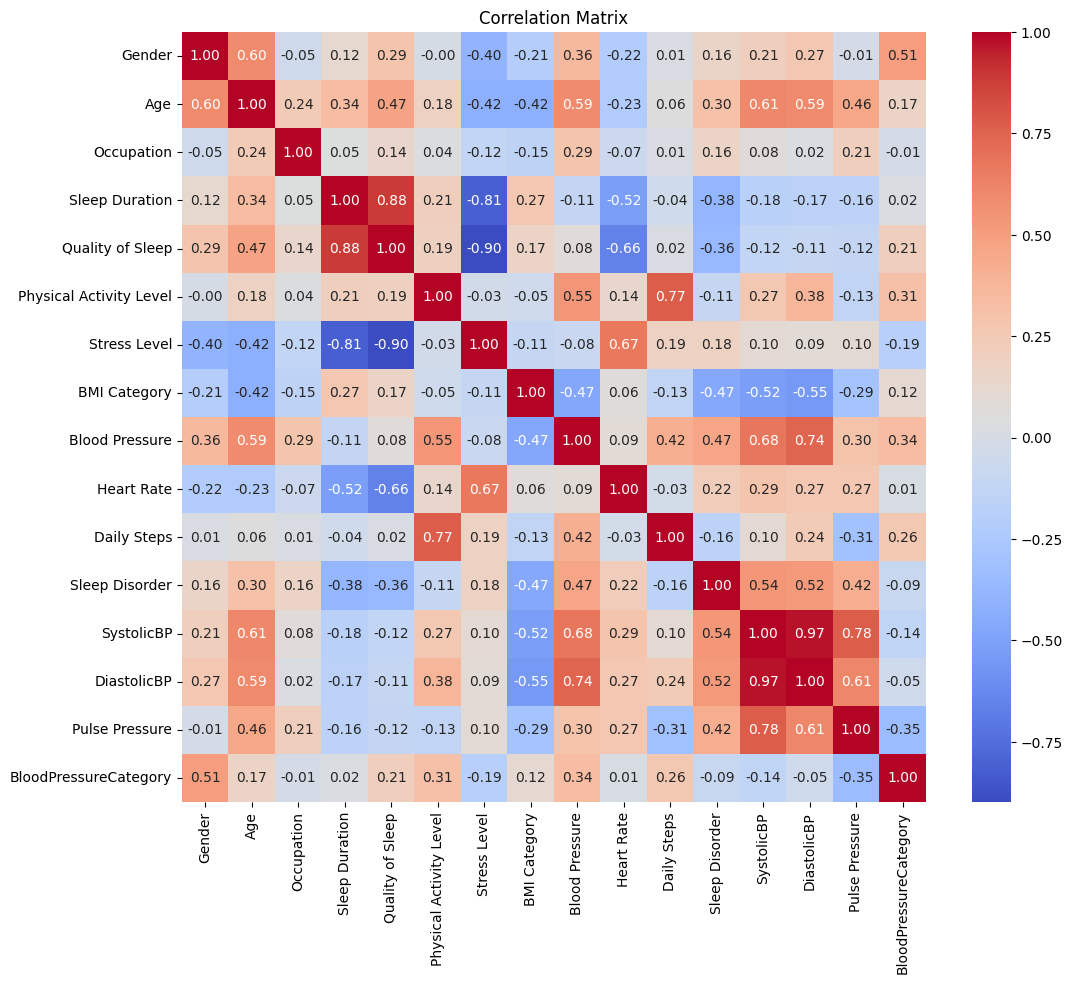

In [706]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Getting the baseline for the accuracy, precision, recall, and F1-score

Getting the best model using Grid Search

In [707]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
rf_model = grid_search.best_estimator_

In [708]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.88
Precision: 0.8818596218596219
Recall: 0.88
F1-Score: 0.8785395537525356


# Dropping redundant columns.

In [709]:
# Age Sleep Duration Pulse Pressure
columns_to_drop = ["Blood Pressure", "SystolicBP", "DiastolicBP", "Quality of Sleep" , "Daily Steps", "BMI Category", "Heart Rate", "Occupation"]
df = df.drop(columns_to_drop, axis=1)
df

,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,Sleep Disorder,Pulse Pressure,BloodPressureCategory
0,0,27,6.1,42,6,0,43,0
1,0,28,6.2,60,8,0,45,0
2,0,28,6.2,60,8,0,45,0
3,0,28,5.9,30,8,1,50,1
4,0,28,5.9,30,8,1,50,1
...,...,...,...,...,...,...,...,...
369,1,59,8.1,75,3,1,45,1
370,1,59,8.0,75,3,1,45,1
371,1,59,8.1,75,3,1,45,1
372,1,59,8.1,75,3,1,45,1


# Trying Algorithms

In [710]:
x = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
score_list = {}

Optimal Values

In [711]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

KNN

In [712]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=22)

KNN.fit(x_train,y_train)
knn_score = KNN.score(x_test,y_test)
score_list["KNN Classifier"] = knn_score
print(f"Score is {knn_score}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Score is 0.84
Cross-validation scores: [0.64       0.93333333 0.97333333 0.56       0.39189189]
Average cross-validation score: 0.6997117117117118


Logistic Regression

In [713]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)

lr_score = LR.score(x_test,y_test)
score_list["Logistic Regression"] = lr_score

print(f"Score is {lr_score}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Score is 0.88
Cross-validation scores: [0.64       0.93333333 0.97333333 0.56       0.39189189]
Average cross-validation score: 0.6997117117117118


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes

In [714]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(x_train,y_train)
nbc_score = nbc.score(x_test,y_test)
score_list["GaussianNBC"] = nbc_score

print(f"Score is {nbc_score}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Score is 0.6533333333333333
Cross-validation scores: [0.64       0.93333333 0.97333333 0.56       0.39189189]
Average cross-validation score: 0.6997117117117118


SVM

In [715]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
svc_score = svc.score(x_test,y_test)
score_list["SVC"] = svc_score
print(f"Score is {svc_score}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Score is 0.7066666666666667
Cross-validation scores: [0.64       0.93333333 0.97333333 0.56       0.39189189]
Average cross-validation score: 0.6997117117117118


Decision Tree

In [716]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(x_train,y_train)

dtc_score = dtc.score(x_test,y_test)
score_list["DTC"] = dtc_score
print(f"Score is {dtc_score}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Score is 0.9066666666666666
Cross-validation scores: [0.64       0.93333333 0.97333333 0.56       0.39189189]
Average cross-validation score: 0.6997117117117118


Check all scores

In [717]:
for model_name, score in score_list.items():
  print(f"{model_name}: {score}")

KNN Classifier: 0.84
Logistic Regression: 0.88
GaussianNBC: 0.6533333333333333
SVC: 0.7066666666666667
DTC: 0.9066666666666666


-- Conclusion, Random Forest Algorithm is the most optimal algorithm for this dataset.

# Getting the final scores

In [718]:
df

,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,Sleep Disorder,Pulse Pressure,BloodPressureCategory
0,0,27,6.1,42,6,0,43,0
1,0,28,6.2,60,8,0,45,0
2,0,28,6.2,60,8,0,45,0
3,0,28,5.9,30,8,1,50,1
4,0,28,5.9,30,8,1,50,1
...,...,...,...,...,...,...,...,...
369,1,59,8.1,75,3,1,45,1
370,1,59,8.0,75,3,1,45,1
371,1,59,8.1,75,3,1,45,1
372,1,59,8.1,75,3,1,45,1


In [719]:
x = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [720]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [721]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
rf_model = grid_search.best_estimator_

In [722]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.88
Precision: 0.877324414715719
Recall: 0.88
F1-Score: 0.8762960092987214


# Testing the model

Test data yielding 0 or None for the Sleep Disorder

In [723]:
data = {
    'Gender': [0],
    'Age': [30], # Example: Younger age
    'Sleep Duration': [7.5], # Example: Healthy sleep duration
    'Stress Level': [3], # Example: Average stress level
    'Physical Activity Level': [83], # Example: High Activity Level
    'Pulse Pressure': [45], # Example: Low pulse pressure
    'BloodPressureCategory': [1] # Example: Low blood pressure category
}

dummy_df = pd.DataFrame(data)
dummy_df = dummy_df[x_train.columns]


predicted_sleep_disorder = rf_model.predict(dummy_df)

print(f"Predicted Sleep Disorder: {predicted_sleep_disorder}")

Predicted Sleep Disorder: [0]


Test data yielding 1 or Insomnia for Sleep Disorder

In [724]:
data = {
    'Gender': [1],
    'Age': [55],  # Example: Older age
    'Sleep Duration': [4.5],  # Example: Low sleep duration
    'Stress Level': [5],  # Example: High stress level
    'Physical Activity Level': [32],  # Example: Low Activity Level
    'Pulse Pressure': [65],  # Example: High pulse pressure
    'BloodPressureCategory': [3]  # Example: High blood pressure category
}

dummy_df = pd.DataFrame(data)
dummy_df = dummy_df[x_train.columns]


predicted_sleep_disorder = rf_model.predict(dummy_df)

print(f"Predicted Sleep Disorder: {predicted_sleep_disorder}")

Predicted Sleep Disorder: [1]
